In [1]:
import cv2
import numpy as np
from PIL import Image

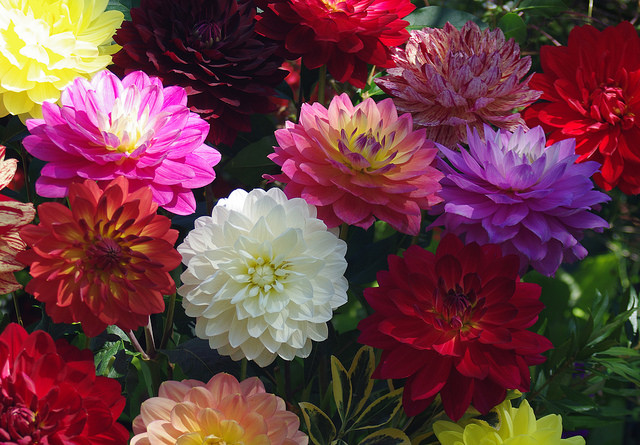

In [2]:
img  = Image.open("img/flowers.jpg")
img

In [3]:
img_array = np.array(img)

In [4]:
cx, cy, r= 200, 200, 50

In [5]:
xy_map = np.transpose(np.mgrid[0:640, 0:455],[2,1,0]).astype('float32')

dist = np.sqrt(np.sum((xy_map-(cx,cy))**2, axis=2))
area = dist < 2*r
area2 = dist < 3*r
area2 = area2 &  (~area)

xy_map[area] = (xy_map[area]-(cx,cy))/2 + (cx, cy)
unit_ratio = r/dist[area2][:, None]
xy_map[area2] = (xy_map[area2]-(cx,cy))* (2-3*unit_ratio) + (cx,cy)

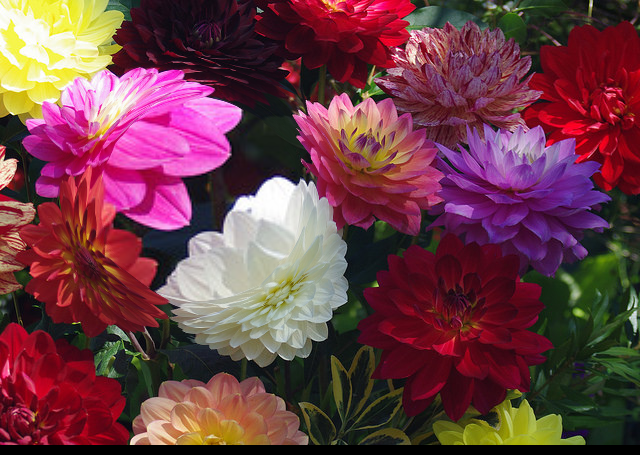

In [6]:
img_array_remap  = cv2.remap(img_array, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_array_remap)

In [7]:
# 讀取已經學習過的臉部偵測 haar cascade
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')


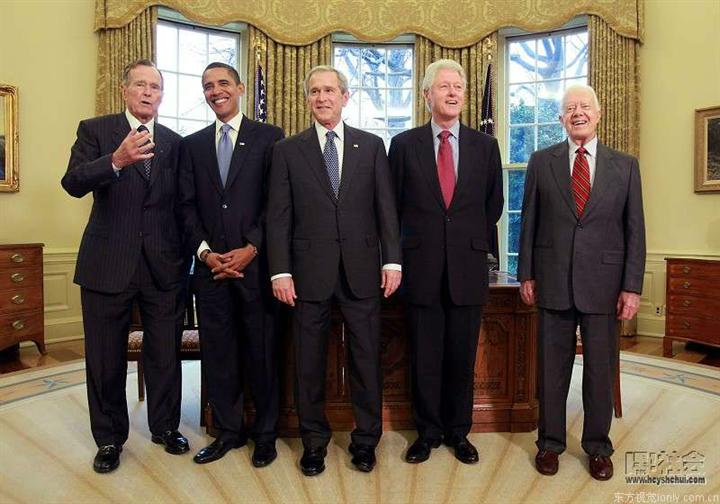

In [8]:
from urllib.request import urlopen
img = Image.open(urlopen("http://userimage2.360doc.com/12/0402/14/868418_201204021411470567.jpg"))
img = np.array(img)
#img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
Image.fromarray(img)

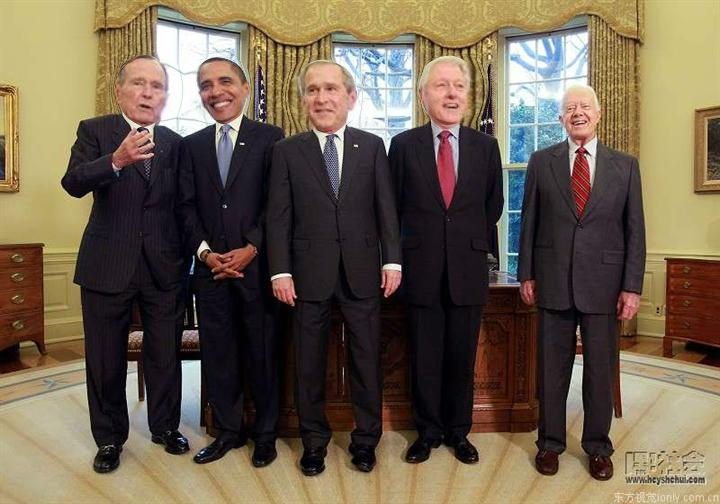

In [12]:
# 從裡面來找找看臉吧
faces = face_cascade.detectMultiScale(gray, 1.1, 5)
xy_map = np.transpose(np.mgrid[0:img.shape[1], 0:img.shape[0]],[2,1,0]).astype('float32')
for (x,y,w,h) in faces:    
    r = (max(w,h)/2)*1.1
    cx, cy = x+w/2, y+h/2
    dist = np.sqrt(np.sum((xy_map-(cx,cy))**2, axis=2))
    area = dist < 1.3*r
    area2 = dist < 1.6*r
    area2 = area2 &  (~area)
    xy_map[area] = (xy_map[area]-(cx,cy))/1.3 + (cx, cy)
    unit_ratio = r/dist[area2][:, None]
    xy_map[area2] = (xy_map[area2]-(cx,cy))* (2 - 1.6*unit_ratio) + (cx,cy)

img_remap  = cv2.remap(img, xy_map, None, cv2.INTER_LINEAR)
Image.fromarray(img_remap)
